В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook.

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT 
  DATE_TRUNC('month', creation_date):: date, 
  SUM(views_count) 
FROM 
  stackoverflow.posts 
WHERE 
  DATE_TRUNC('Year', creation_date) = '2008-01-01' 
GROUP BY 
  DATE_TRUNC('month', creation_date) 
ORDER BY 
  SUM(views_count) DESC
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,date_trunc,sum
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

**Ответ:** Резкий рост просмотров опубликованны постав на сайте связан с тем, что платформа Stack Overflow только начала функционировать в 2008 году, соответственно рост просмотра постов связан с тем что проект начинал привликать свою целевую аудитори и внимание пользователей.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [8]:
# напишите запрос
query = '''
SELECT 
  us.display_name, 
  COUNT(DISTINCT pst.user_id) 
FROM 
  stackoverflow.users AS us 
  JOIN stackoverflow.posts AS pst ON pst.user_id = us.id 
  JOIN stackoverflow.post_types AS pt ON pst.post_type_id = pt.id 
WHERE 
  pst.creation_date :: date BETWEEN us.creation_date :: date 
  AND (
    us.creation_date :: date + INTERVAL '1 month'
  ) 
  AND pt.type LIKE 'Answer' 
GROUP BY 
  us.display_name 
HAVING 
  COUNT(pst.id) > 100 
ORDER BY 
  us.display_name
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df.head(15)

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
5,Amy B,1
6,Ben Hoffstein,1
7,Brian,15
8,Cade Roux,1
9,CesarB,1


In [9]:
sample_df['display_name'].unique()

array(['1800 INFORMATION', 'Adam Bellaire', 'Adam Davis', 'Adam Liss',
       'Alan', 'Amy B', 'Ben Hoffstein', 'Brian', 'Cade Roux', 'CesarB',
       'Chris', 'ConcernedOfTunbridgeWells', 'Craig', 'Dale Ragan', 'Dan',
       'Eric Z Beard', 'Espo', 'FlySwat', 'Franci Penov', 'GEOCHET',
       'GateKiller', 'Greg', 'Gulzar Nazim', 'Ilya Kochetov',
       'James Curran', 'Jim', 'Joe', 'Joel Coehoorn',
       'Johannes Schaub - litb', 'John Millikin', 'Jon Limjap',
       'Jon Skeet', 'Jorge Ferreira', 'Josh', 'Keith', 'Kevin', 'Kibbee',
       'Konrad Rudolph', 'Lasse Vågsæther Karlsen', 'Lou Franco',
       'Marc Gravell', 'Mark', 'Mark Cidade', 'Mark Harrison',
       'Martin v. Löwis', 'Matt', 'Matt Hamilton', 'Michael Burr',
       'Michael Stum', 'Mitchel Sellers', 'Nick', 'Norman Ramsey', 'Oli',
       'Orion Edwards', 'Paul Nathan', 'PhiLho', 'Rob', 'Rob Cooper',
       'Rob Walker', 'Ryan', 'S.Lott', 'Sklivvz', 'Steven A. Lowe',
       'TheSmurf', 'Tom', 'Vilx-', 'Vinko Vrsalovi

Какие аномалии наблюдаются в данных? О чём они говорят?

**Ответ:** Существуют неформатные данные со спец символами 'Lasse Vågsæther Karlsen', а также неизвестный ник '1800 INFORMATION'. Это говорит нам о том что для имени польователя не была выстроена система проверки на корректность

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [11]:
# напишите запрос
query = '''
WITH users_1 AS (
  SELECT 
    us.id 
  FROM 
    stackoverflow.users AS us 
    JOIN stackoverflow.posts AS pst ON us.id = pst.user_id 
  WHERE 
    (
      us.creation_date :: date BETWEEN '2008-09-01' 
      AND '2008-09-30'
    ) 
    AND (
      pst.creation_date :: date BETWEEN '2008-12-01' 
      AND '2008-12-31'
    ) 
  GROUP BY 
    us.id
) 
SELECT 
  DATE_TRUNC('month', pst.creation_date):: date, 
  COUNT(pst.id) 
FROM 
  stackoverflow.posts AS pst 
WHERE 
  pst.user_id IN (
    SELECT 
      * 
    FROM 
      users_1
  ) 
GROUP BY 
  DATE_TRUNC('month', pst.creation_date):: date 
ORDER BY 
  DATE_TRUNC('month', pst.creation_date):: date DESC
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df.head(15)

,date_trunc,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

**Ответ:** присутствует аномалия в сентябре в виде 32 постов. Вероятно, большинство пользователей зарегестрированных в сентябре не делали посты в декабре.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [13]:
# напишите запрос
query = '''
SELECT 
  user_id, 
  creation_date, 
  views_count, 
  SUM (views_count) OVER (
    PARTITION BY user_id 
    ORDER BY 
      creation_date
  ) 
FROM 
  stackoverflow.posts 
ORDER BY 
  user_id, 
  creation_date
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [14]:
# напишите запрос
query = '''
WITH users_find AS (
  SELECT 
    user_id, 
    DATE_TRUNC('day', creation_date), 
    COUNT(id) AS posts_number 
  FROM 
    stackoverflow.posts 
  WHERE 
    user_id IN (
      SELECT 
        user_id 
      FROM 
        stackoverflow.posts 
      WHERE 
        creation_date BETWEEN '2008-08-01' 
        AND '2008-08-31' 
      GROUP BY 
        user_id 
      HAVING 
        COUNT(id) > 120
    ) 
  GROUP BY 
    user_id, 
    DATE_TRUNC('day', creation_date)
) 
SELECT 
  user_id, 
  AVG(posts_number) 
FROM 
  users_find 
WHERE 
  DATE_TRUNC('month', date_trunc) = '2008-08-01' 
GROUP BY 
  user_id 
ORDER BY 
  AVG(posts_number)

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,user_id,avg
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [15]:
# напишите запрос
query = '''
WITH test AS (
  SELECT 
    user_id, 
    COUNT(
      DISTINCT DATE_TRUNC('day', creation_date)
    ) 
  FROM 
    stackoverflow.posts 
  WHERE 
    creation_date BETWEEN '2008-12-01' 
    AND '2008-12-07' 
  GROUP BY 
    user_id
) 
SELECT 
  ROUND(
    AVG(count)
  ) 
FROM 
  test
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,round
0,2.0


Проанализируйте итоговую таблицу — какие выводы можно сделать?

**Ответ:** В среднем 2 поста было опубликовано каждым пользователем за первые 7 дней декабря.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [17]:
# напишите запрос
query = '''
WITH test AS (
  SELECT 
    user_id, 
    creation_date, 
    LAG(creation_date, 2) OVER (
      PARTITION BY user_id 
      ORDER BY 
        creation_date
    ) AS month_lag 
  FROM 
    stackoverflow.posts 
  ORDER BY 
    user_id
) 
SELECT 
  user_id, 
  creation_date,
       CASE
           WHEN DATE_TRUNC('month', month_lag) = '2008-07-01' THEN 'July'
           WHEN DATE_TRUNC('month', month_lag) = '2008-08-01' THEN 'August'
           WHEN DATE_TRUNC('month', month_lag) = '2008-09-01' THEN 'September'
           WHEN DATE_TRUNC('month', month_lag) = '2008-10-01' THEN 'October'
           WHEN DATE_TRUNC('month', month_lag) = '2008-11-01' THEN 'November'
           WHEN DATE_TRUNC('month', month_lag) = '2008-12-01' THEN 'December'
       END
FROM 
    test
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,user_id,creation_date,case
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [18]:
# напишите запрос
query = '''
WITH profile AS (
  WITH test_1 AS (
    SELECT 
      DISTINCT user_id, 
      MIN(
        DATE_TRUNC('month', creation_date)
      ) OVER (
        PARTITION BY user_id 
        ORDER BY 
          DATE_TRUNC('month', creation_date)
      ) AS cohort_dt 
    FROM 
      stackoverflow.posts
  ) 
  SELECT 
    *, 
    COUNT(user_id) OVER (PARTITION BY cohort_dt) AS cohort_users_cnt 
  FROM 
    test_1
), 
session AS (
  SELECT 
    user_id, 
    DATE_TRUNC('month', creation_date) AS session_date 
  FROM 
    stackoverflow.posts 
  GROUP BY 
    user_id, 
    session_date
) 
SELECT 
  table1.cohort_dt, 
  table2.session_date, 
  COUNT(table1.user_id) AS users_cnt, 
  table1.cohort_users_cnt, 
  ROUND(
    COUNT(table1.user_id) * 100.0 / cohort_users_cnt, 
    2
  ) AS retention_rate
FROM 
  profile AS table1 
  JOIN session AS table2 ON table1.user_id = table2.user_id 
GROUP BY 
  1, 
  2, 
  4
ORDER BY cohort_dt, session_date
'''


# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

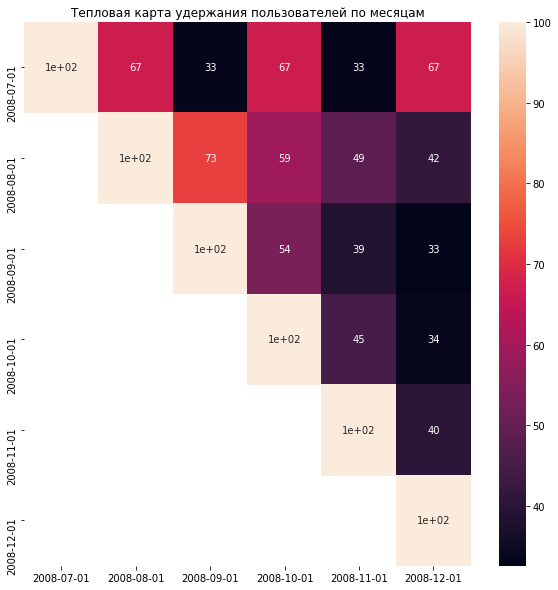

In [19]:
# постройте тепловую карту Retention Rate
import seaborn as sns


map_heat = sample_df.pivot('cohort_dt', 'session_date', 'retention_rate')
map_heat.index = [str(x)[0:10] for x in map_heat.index]
map_heat.columns = [str(x)[0:10] for x in map_heat.columns]
plt.figure(figsize=(10, 10)) 
sns.heatmap(map_heat, 
            annot=True)
plt.title('Тепловая карта удержания пользователей по месяцам') 
plt.show()

**Ответ:** Замечены аномалии для пользователей зарегестрированных в июле, значения повторяются, возможно ошибка в данных. Далее видно что с каждой новой кагортой удержание пользователей становится всё меньше.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [21]:
# напишите запрос
query = '''
WITH test AS (
  SELECT 
    DATE_TRUNC('month', creation_date) AS creation_month, 
    COUNT(id) AS post_cnt 
  FROM 
    stackoverflow.posts 
  WHERE 
    DATE_TRUNC(
      'month', 
      DATE_TRUNC('month', creation_date)
    ) BETWEEN '2008-09-01' 
    AND '2008-12-01' 
  GROUP BY 
    creation_month
) 
SELECT 
  *, 
  ROUND(
    (
      post_cnt :: numeric / LAG(post_cnt) OVER()-1
    )* 100, 
    2
  ) 
FROM 
  test
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,creation_month,post_cnt,round
0,2008-09-01,70371,NaN
1,2008-10-01,63102,-10.33
2,2008-11-01,46975,-25.56
3,2008-12-01,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

In [22]:
import matplotlib.pyplot as plt

In [23]:
sample_df['creation_month'] = sample_df['creation_month'].astype('str')

sample_df.loc[sample_df['creation_month'] == '2008-09-01', 'creation_month'] = "September"
sample_df.loc[sample_df['creation_month'] == '2008-10-01', 'creation_month'] = 'October'
sample_df.loc[sample_df['creation_month'] == '2008-11-01', 'creation_month'] = 'November'
sample_df.loc[sample_df['creation_month'] == '2008-12-01', 'creation_month'] = 'December'

        

In [24]:
sample_df.info

<bound method DataFrame.info of   creation_month  post_cnt  round
0      September     70371    NaN
1        October     63102 -10.33
2       November     46975 -25.56
3       December     44592  -5.07>

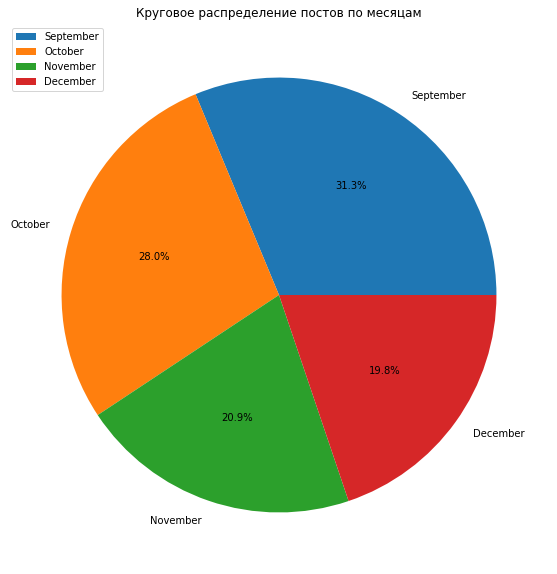

In [25]:
# постройте круговую диаграмму с количеством постов по месяцам

plt.figure(figsize=(15, 10))
plt.pie(sample_df['post_cnt'], labels = sample_df['creation_month'],
        autopct='%1.1f%%')
plt.legend()

plt.title('Круговое распределение постов по месяцам')
plt.show()


# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [26]:
# напишите запрос
query = '''
WITH top_user AS (
  SELECT 
    user_id, 
    COUNT(id) 
  FROM 
    stackoverflow.posts 
  GROUP BY 
    user_id 
  ORDER BY 
    COUNT(id) DESC 
  LIMIT 
    1
) 
SELECT 
  DATE_TRUNC('week', pst.creation_date) AS week_creation, 
  MAX(pst.creation_date) AS creation_date 
FROM 
  top_user AS topu 
  JOIN stackoverflow.posts AS pst ON topu.user_id = pst.user_id 
WHERE 
  DATE_TRUNC('month', pst.creation_date) = '2008-10-01' 
GROUP BY 
  week_creation 
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine)
sample_df

,week_creation,creation_date
0,2008-09-29,2008-10-05 09:00:58
1,2008-10-06,2008-10-12 21:22:23
2,2008-10-13,2008-10-19 06:49:30
3,2008-10-20,2008-10-26 21:44:36
4,2008-10-27,2008-10-31 22:16:01
